In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Trupti
[nltk_data]     Kendre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# creating empty reviews list
iphone13_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone13_reviews=iphone13_reviews+ip

# writng reviews in a text file 
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [3]:
iphone13_reviews

["\nAccording to me guysFirst of all I haven't purchased iPhoneSecondly according to me if you have this much budget of more than 1lakhs spending on mobile is not worth at allInfact you can invest that money on apple stock or other  stock  so that the money could get doubled in future bcoz buying  iPhone is a depreciating assetHope you understand 🙂\n",
 "\nAccording to me guysFirst of all I haven't purchased iPhoneSecondly according to me if you have this much budget of more than 1lakhs spending on mobile is not worth at allInfact you can invest that money on apple stock or other  stock  so that the money could get doubled in future bcoz buying  iPhone is a depreciating assetHope you understand 🙂\n",
 '\nThe product is good but think carefully before buying from here. Apple has new warranty policies. In case of defective product you will not get a replacement no matter whatever is mentioned here. I received a defective device and did not get a replacement from amazon.\n',
 "\nAccording

In [4]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone13_reviews)


In [5]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [6]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)
# stop_words = stopwords.words('english')

['', 'according', 'to', 'me', 'guysfirst', 'of', 'all', 'i', 'haven', 't', 'purchased', 'iphonesecondly', 'according', 'to', 'me', 'if', 'you', 'have', 'this', 'much', 'budget', 'of', 'more', 'than', 'lakhs', 'spending', 'on', 'mobile', 'is', 'not', 'worth', 'at', 'allinfact', 'you', 'can', 'invest', 'that', 'money', 'on', 'apple', 'stock', 'or', 'other', 'stock', 'so', 'that', 'the', 'money', 'could', 'get', 'doubled', 'in', 'future', 'bcoz', 'buying', 'iphone', 'is', 'a', 'depreciating', 'assethope', 'you', 'understand', 'according', 'to', 'me', 'guysfirst', 'of', 'all', 'i', 'haven', 't', 'purchased', 'iphonesecondly', 'according', 'to', 'me', 'if', 'you', 'have', 'this', 'much', 'budget', 'of', 'more', 'than', 'lakhs', 'spending', 'on', 'mobile', 'is', 'not', 'worth', 'at', 'allinfact', 'you', 'can', 'invest', 'that', 'money', 'on', 'apple', 'stock', 'or', 'other', 'stock', 'so', 'that', 'the', 'money', 'could', 'get', 'doubled', 'in', 'future', 'bcoz', 'buying', 'iphone', 'is', 'a

In [7]:
import spacy
nlp=spacy.load('en_core_web_md')
one_block=iphone13_reviews[15]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [9]:
with open("C:\\Users\\Trupti Kendre\\Downloads\\stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [10]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)

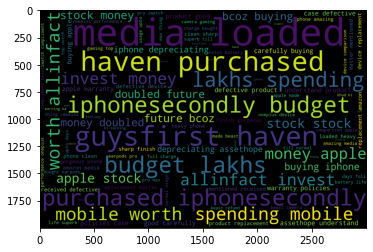

In [11]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [13]:
# positive words # Choose the path for +ve words stored in system
with open("C:\\Users\\Trupti Kendre\\Downloads\\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")


In [14]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

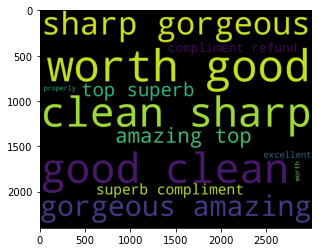

In [15]:

# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [17]:
# negative words  Choose path for -ve words stored in system
with open("C:\\Users\\Trupti Kendre\\Downloads\\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [18]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])



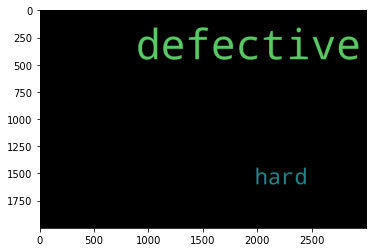

In [19]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)